In [1]:
library('palmerpenguins')
library('tidyverse')
library('tidymodels')

theme_set(theme_grey(base_size = 14))
options(repr.plot.height = 4, repr.plot.width = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Using TidyModels 

Now that we know how we arrive at a line of best fit, let's use `R` to build a simple linear model.

We will model Adelie penguin **bill length** with measurements of **bill depth**.

In [2]:
adelie_data = penguins |>
    filter(species == 'Adelie') |>
    select(bill_length_mm, bill_depth_mm, species) |>
    drop_na()

adelie_data |> head()

bill_length_mm,bill_depth_mm,species
<dbl>,<dbl>,<fct>
39.1,18.7,Adelie
39.5,17.4,Adelie
40.3,18.0,Adelie
36.7,19.3,Adelie
39.3,20.6,Adelie
38.9,17.8,Adelie


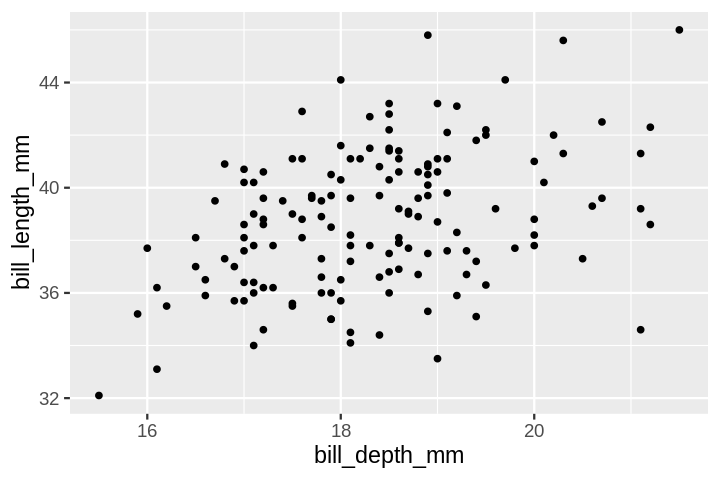

In [3]:
ggplot(adelie_data, aes(x = bill_depth_mm, y = bill_length_mm)) +
    geom_point()

In this course we will be using the [TidyModels](https://www.tidymodels.org/) package to build our models. The syntax is fairly simple and can be generalized to other modeling algorithms beyond simple linear regression. 

First we set the kind of model we are building. In this case, we are building a linear model (hence `linear_reg`). We have loads of models to choose from. Follow [this link](https://www.tidymodels.org/find/parsnip/) to see them all.

In [4]:
linear_reg() |> set_engine('lm')

Linear Regression Model Specification (regression)

Computational engine: lm 


In [5]:
# This sets our model which we'll call "mod"
# set_engine sets the computational "engine" we want to use

mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


Now we need to fit our model to the data. In `R`, we get to use a special **formula syntax** to define which columns in our data represent the **outcome** and which columns represent the explanatory/predictor variables.

The left hand side of our "formula" denotes the outcome, and the right hand side the predictors. In between there is a tilde (~).

E.g.
```R
outcome_column_name ~ predictor_column_name
```

In [ ]:
# y = m(x) + b 
# "model parameters"

In [6]:
# The formula is the first argument to the fit function

mod_fit = mod |> fit(bill_length_mm ~ bill_depth_mm, data = adelie_data)

# We can use the tidy function to get a table of our model information

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),23.0680794,3.0342298,7.602615,3.007505e-12
bill_depth_mm,0.8570263,0.1650259,5.193285,6.674141e-07


In [7]:
mod_fit

parsnip model object


Call:
stats::lm(formula = bill_length_mm ~ bill_depth_mm, data = data)

Coefficients:
  (Intercept)  bill_depth_mm  
       23.068          0.857  


That's it! We created our model, now let's see what it looks like 😄. 

## Visualizing our model

We first need to create some predictions to vizualize our model. Let's add a column to our `adelie_data` table with predictions.

In [8]:
# The predict function takes a table with predictors and predicts outcomes given our model 
 
predict(mod_fit, new_data = adelie_data) |> head()

.pred
<dbl>
39.09447
37.98034
38.49455
39.60869
40.72282
38.32315


In [9]:
# The predict function takes a table with predictors and predicts outcomes given our model 
 
predict(mod_fit, new_data = data.frame(bill_depth_mm = c(16)))

.pred
<dbl>
36.7805


In [10]:
# ...and we can use the augment function to add these predictions to our table

adelie_data2 = augment(mod_fit, adelie_data)

adelie_data2 |> head()

bill_length_mm,bill_depth_mm,species,.pred,.resid
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
39.1,18.7,Adelie,39.09447,0.00552844
39.5,17.4,Adelie,37.98034,1.51966266
40.3,18.0,Adelie,38.49455,1.80544686
36.7,19.3,Adelie,39.60869,-2.90868735
39.3,20.6,Adelie,40.72282,-1.42282157
38.9,17.8,Adelie,38.32315,0.57685213


The `.pred` column holds our model predictions.

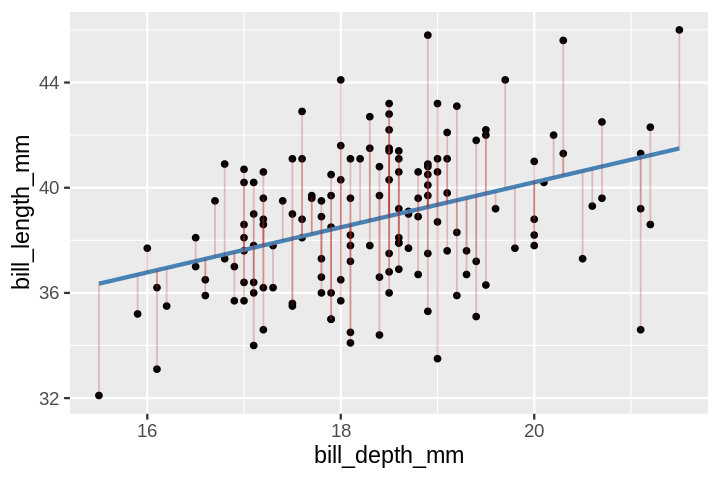

In [13]:
ggplot(adelie_data2) +
    geom_point(aes(x = bill_depth_mm, y = bill_length_mm)) + 
    geom_line(aes(x = bill_depth_mm, y = .pred), color = 'steelblue', linewidth = 1.2) +
    geom_segment(aes(x = bill_depth_mm, xend = bill_depth_mm, y = .pred, yend = bill_length_mm), 
                 color = 'firebrick',
                 alpha = 0.25)